<a href="https://colab.research.google.com/github/iobis/pyobis/blob/main/notebooks/migration_patterns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Migration Patterns over time
Many plant and animal species are being found further north and at higher elevations than previously observed. Rising temperatures, changing precipitation patterns and shifts in vegetation communities are changing the effective range and distribution of many native and agricultural species.

It is likely that not all species in a community will respond to climate change in the same manner, or at the same rate. Some species may move readily across landscapes or habitats, as warming temperatures and changing ecological conditions alter their habitat. Less mobile species will change their distribution more slowly.

The consequences of species migration include:

+ Potential geographic split between species that rely on one another.
+ Planting zones are shifting further north.
+ Pests and diseases may shift their ranges into regions that have historically been unsuitable for them.
+ Extinction may occur if a species is unable to migrate, becomes separated from another species it relies on, or is threatened by a new pest, disease or predator.

The [Ocean Biodiversity Information System (OBIS)](https://obis.org) is a global open-access data and information clearing-house on marine biodiversity for science, conservation and sustainable development. OBIS aims to provide world’s largest scientific knowledge base on the diversity, distribution and abundance of all marine organisms in an integrated and standardized format.) is a global open-access data and information clearing-house on marine biodiversity for science, conservation and sustainable development. OBIS aims to provide world’s largest scientific knowledge base on the diversity, distribution and abundance of all marine organisms in an integrated and standardized format.


In this notebook we will utilise `pyobis` to fetch OBIS occurrence records and visualize migration patterns for different species. Let us install `pyobis` first.

## Installing pyobis

In [1]:
try:
  import pyobis
except:
  !pip install -q git+https://github.com/iobis/pyobis.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done


### adding more libraries

In [2]:
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

## Grabbing data

Let us grab some data of occurrence records for *Mola mola* and clean it. We will then visualize the migration pattern over time by plotting it on a world map.

In [3]:
from pyobis.occurrences import OccQuery
occ = OccQuery()

In [4]:
res = occ.search(scientificname="Mola mola")["results"]
df = pd.DataFrame(res)
df


Fetched 20978 records.


,infraphylum,date_year,scientificNameID,scientificName,individualCount,associatedReferences,dropped,gigaclassid,aphiaID,decimalLatitude,...,verbatimLongitude,islandGroup,typeStatus,associatedSequences,namePublishedInID,verbatimCoordinateSystem,disposition,originalNameUsage,associatedMedia,dataGeneralizations
0,Gnathostomata,2007.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,"[{""crossref"":{""citeinfo"":{""origin"":""Halpin, P....",False,10194,127405,42.380000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Gnathostomata,2019.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,NaN,"[{""crossref"":{""citeinfo"":{""origin"":""APEM and N...",False,10194,127405,34.541400,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Gnathostomata,2012.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,NaN,NaN,False,10194,127405,43.107460,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Gnathostomata,1979.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,"[{""crossref"":{""citeinfo"":{""origin"":""Cetacean a...",False,10194,127405,41.333000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Gnathostomata,2012.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,NaN,NaN,False,10194,127405,47.155420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20973,Gnathostomata,2006.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,"[{""crossref"":{""citeinfo"":{""origin"":""Halpin, P....",False,10194,127405,43.670000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20974,Gnathostomata,2006.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,"[{""crossref"":{""citeinfo"":{""origin"":""Gatzke J, ...",False,10194,127405,40.952670,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20975,Gnathostomata,2002.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,NaN,NaN,False,10194,127405,56.182110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20976,Gnathostomata,2003.0,urn:lsid:marinespecies.org:taxname:127405,Mola mola,1,NaN,False,10194,127405,-38.650600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
!jupyter nbextension enable --py widgetsnbextension
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [6]:
import plotly.graph_objects as go
import plotly.express as px

In [7]:
data = df[df["year"].notnull()]
data = data[data["year"]!="#VALUE!"]
data = data[data["year"]!=np.NaN]
data = data.sort_values(by="year")

We now have the year values but some year values are only two-digit. We do not know which year that might be. So, to determine the year let us do a workaround and get the corresponding `year` from the `eventDate` parameter.

In [8]:
data["year"] = data["year"].astype(int) # first changing to int data type to ease comparison
newYears = df.loc[data[data["year"].isin([1,2,3,5,6,14,15,18,20,21,22,26,27,31])].index,"eventDate"].str[:4] # getting only specific values
data.loc[newYears.index,"year"] = newYears.astype(int) # replacing with the new year value

In [9]:
data = data.sort_values(by="year")

In [10]:
@interact
def select_country(year = list(data.year.unique())):
    fig = px.scatter_geo(data[data["year"]==year],lat="decimalLatitude", lon="decimalLongitude", hover_name="scientificName")
    fig.update_layout(height=400, margin={"r":0,"t":40,"l":0,"b":10}, title="World map Mola mola in {}".format(year))
    fig.show();

interactive(children=(Dropdown(description='year', options=(1870, 1883, 1889, 1899, 1901, 1908, 1913, 1914, 19…

There is a high variation in number of records with geodata per year. Some years like 2012 has got huge amount of records while records are mostly in two digits in the other years.

Let us visualize some more species, and for this we'll first create a class and its methods and pass in species later.

### A generic class to generate world maps

In [11]:
import os
import imageio
from IPython.display import Image

In [12]:
try:
  import geopandas as gpd 
except:
  !pip install -q geopandas
  import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.4 MB/s 
     |████████████████████████████████| 16.7 MB 55.3 MB/s 
     |████████████████████████████████| 6.3 MB 47.8 MB/s 


In [13]:
try:
  import gif # if it isn't installed then run again to import package
except:
  !pip install -q gif
  import gif

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gif: filename=gif-3.0.0-py3-none-any.whl size=4818 sha256=70254e0f4d7794427af8f5d102318c98a39dfc9e7cff752c07e981f02134f352
  Stored in directory: /root/.cache/pip/wheels/21/63/09/b1e3c512d244da0a7c1d9565f09592612d04b79ccbb95146ae
Successfully built gif


In [14]:
plt.style.use("seaborn")
gif.options.matplotlib["dpi"] = 300

In [15]:
class species:
  def __init__(self, name):
    """ 
    To plot species year-on-year on world map
    ::param species: [string] scientificname of species
    # Example Usage:
    # Plotting world map for a particular species
    wmap = species("Mola mola")
    wmap.plot()
    """
    self.name = name
    self.res = occ.search(scientificname=self.name)["results"]
    
    # dressing data i.e. cleans and removes NaNs
    df = pd.DataFrame(self.res)
    data = df[df["eventDate"].notna()]
    data = data[data["eventDate"].notnull()]
    data = data[data["eventDate"]!="#VALUE!"]
    data = data[data["eventDate"]!=np.NaN]
    data = data.replace('NA','0000-00-00')
    data = data[data["eventDate"]!='0000-00-00']
    data = data.sort_values(by="eventDate")
    data.eventDate = data.eventDate.str[:4].astype(int)
    
    # setting data object of the class to the cleaned data
    self.data=data

  def inter_plot(self):
    """
    Plot an interactive map using Plotly GeoObjects

    ::returns: an interactive IPython object that contains a plotly geomap
    """
    @interact
    def select_country(year = list(self.data.eventDate.unique())):
        fig = px.scatter_geo(self.data[self.data["eventDate"]==year],lat="decimalLatitude", lon="decimalLongitude", hover_name="scientificName")
        fig.update_layout(height=400, margin={"r":0,"t":40,"l":0,"b":10}, title=f"World map - {self.data.scientificName[0]} in {year}")
        fig.show();

  def make_gif(self, year=None, duration=15):
    """
    To create a GIF of migration patterns after a threshold year (if provided else the starting year from records)
    ::param year: [Int] the threshold year. Plot all records on map only which are after this year. Default the starting year of records

    ::returns: a GIF. Saved at maps.gif
    """
    year =  year if year else self.res["eventDate"].min()
    _df = self.data[self.data["eventDate"]>=year]
    frames = []
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    # iterating over years and creating images
    @gif.frame
    def plotframes(year):
      sns.set(rc={'figure.figsize':(10,7)})
      countries.plot(color="lightgrey")
      p = sns.scatterplot(data=_df[_df["eventDate"]==year], x="decimalLongitude", y="decimalLatitude")
      p.set_title(f"{_df.scientificName[0]} - {year}");
    
    # plot maps
    for year in _df.eventDate.unique():
      frames.append(plotframes(year))
    gif.save(frames, "maps.gif", duration=duration, unit="s", between="startend")
    Image(open("maps.gif","rb").read())

Now that we have created a class for the visualization of each species, let us call it once for *Delphinus*.

In [16]:
wmap = species("Delphinus")


Fetched 81334 records.


In [17]:
wmap.inter_plot()

interactive(children=(Dropdown(description='year', options=(1758, 1770, 1800, 1892, 1896, 1897, 1902, 1905, 19…

This data looks promising, and after 1970s we have got a lot of data points. We can also create an interesting animation using matplotlib and this data. So let's do this.

In [18]:
from matplotlib import animation as anim
from matplotlib.colors import LinearSegmentedColormap

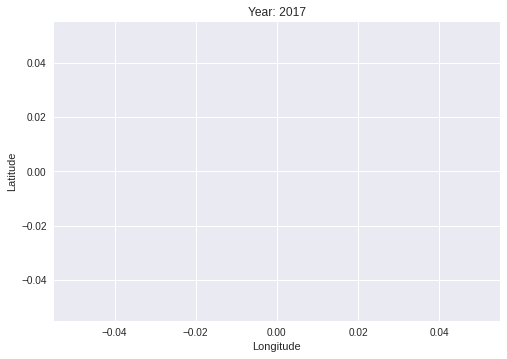

In [19]:
fig, ax = plt.subplots()
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
x_vals = []
y_vals = []
intensity = []
iterations = 100

t_vals = np.linspace(0,1, iterations)

colors = [[0,0,1,0],[0,0,1,0.5],[0,0.2,0.4,1]]
cmap = LinearSegmentedColormap.from_list("", colors)
scatter = ax.scatter(x_vals,y_vals, c=[], cmap=cmap, vmin=0,vmax=1)
__I = 0 # starting with the first coordinates

def get_new_vals():
    global __I
    x = wmap.data.decimalLongitude[__I]
    y = wmap.data.decimalLatitude[__I]
    __I+=1
    return [x], [y]

def update(t):
    global x_vals, y_vals, intensity
    # plot the basemap first
    countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
    countries.plot(color="lightgrey")
    
    # Get intermediate points
    new_xvals, new_yvals = get_new_vals()
    x_vals.extend(new_xvals)
    y_vals.extend(new_yvals)


    # Put new values in your plot
    scatter.set_offsets(np.c_[x_vals,y_vals])

    #calculate new color values
    intensity = np.concatenate((np.array(intensity)*0.96, np.ones(len(new_xvals))))
    scatter.set_array(intensity)

    # Set title
    ax.set_title(f"Year: {wmap.data.eventDate[__I]}")

ani = anim.FuncAnimation(fig, update, frames=t_vals,interval=50)
plt.show()

Note: 
this plot would not show up in a Jupyter Notebook because the $DISPLAY is not set for matplotlib and interactive output from matplotlib is not fetched. Try restarting the runtime in your local system and before any other import, execute this, and then execute the plot. It will run.
```python
import matplotlib
matplotlib.use('TkAgg')
```

In [20]:
wmap.make_gif(year=1970, duration=20)

We can still visualize year-on-year on the above world map but let us create a GIF of plots after 1970 - that looks something creative, isn't it? So lets get started.

So let us make this gif, and view it.

In [21]:
Image(open("maps.gif","rb").read())

Whoa, this GIF is interesting. But we can make out some obeservation:
+ There's a high variance in amount of records over years. Years after 2000s have witnessed huge amount of records.
+ Dolphins have not faced an witnessed spatial migration, there are more or less found at the same places over years.

Now let us visualize this trend over a 3D geotemporal plot for the same data.

In [22]:
wmap = species("Mola mola")


Fetched 20978 records.


For plotting out occurrence records on a 3D time series plot, we do two things:
+ paint a base world map on the back so that its easy to view the points
+ paint a colormap to easily make out how points changed gradually with time.

Let us first extract coordinated from continents to paint a basemap.

In [23]:
from shapely.geometry import MultiPolygon

In [24]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
def points_from_polygons(polygons):
    points = []
    for mpoly in polygons:
        if isinstance(mpoly, MultiPolygon):
            polys = list(mpoly)
        else:
            polys = [mpoly]
        for polygon in polys:
            for point in polygon.exterior.coords:
                points.append(point)
            for interior in polygon.interiors:
                for point in interior.coords:
                    points.append(point)
    return points

points = points_from_polygons(countries.geometry)
x = [point[0] for point in points]
y = [point[1] for point in points]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ShapelyDeprecationWarning:

Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: ShapelyDeprecationWarning:

__len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.



Let us now draw the map.

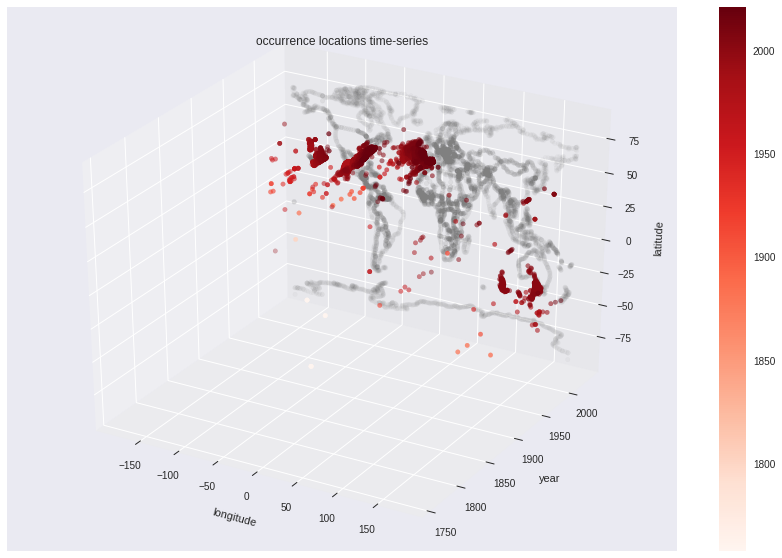

In [25]:
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection='3d')
p = ax.scatter(wmap.data["decimalLongitude"], wmap.data["eventDate"], wmap.data["decimalLatitude"],c=wmap.data["eventDate"], cmap="Reds")
ax.scatter(x,[2030]*len(x),y, color='grey', alpha=0.05)
ax.set_ylabel("year", labelpad=14)
ax.set_xlabel("longitude", labelpad=14)
ax.set_zlabel("latitude", labelpad=14)
plt.title("occurrence locations time-series")
plt.colorbar(p, ax=ax)
plt.show()

We can make out two observations from this plot:
+ as the years have progressed, the data has diversified to more regions, there are more data points
+ records are more concentrated around (40, -25) which falls right into the North Atlantic Ocean.